In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [2]:
data = pd.read_csv('unit4.csv')

In [3]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [4]:
data.dtypes

STATE        object
PVASTATE     object
DOB           int64
MDMAUD       object
RECP3        object
GENDER       object
DOMAIN       object
INCOME      float64
HOMEOWNR     object
HV1           int64
HV2           int64
HV3           int64
HV4           int64
IC1           int64
IC2           int64
IC3           int64
IC4           int64
IC5           int64
VETERANS     object
NUMPROM       int64
CARDPROM      int64
CARDPM12      int64
NUMPRM12      int64
MAXADATE      int64
RFA_2        object
NGIFTALL      int64
TIMELAG     float64
AVGGIFT     float64
dtype: object

In [5]:
# nulls = pd.DataFrame(data.isna().sum()/len(data))
# nulls= nulls.reset_index()
# nulls.columns = ['column_name', 'Percentage Null Values']
# nulls.sort_values(by='Percentage Null Values', ascending = False)

In [6]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [7]:
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


In [8]:
data['PVASTATE'].value_counts()
data = data.drop(['PVASTATE'], axis=1)

In [9]:
data['RECP3'].value_counts()
data = data.drop(['RECP3'], axis=1)

In [10]:
data['VETERANS'].value_counts()
data = data.drop(['VETERANS'], axis=1)

In [11]:
data['HOMEOWNR'].value_counts()

H    49646
     21051
U    19872
Name: HOMEOWNR, dtype: int64

In [12]:
def clean_homeownr(x):
    if x == " ":
        return 'other'
    else:
        return x
data['HOMEOWNR'] = list(map(clean_homeownr, data['HOMEOWNR']))
data['HOMEOWNR'].value_counts()

H        49646
other    21051
U        19872
Name: HOMEOWNR, dtype: int64

In [13]:
data['GENDER'].value_counts()

F    48668
M    37132
      2795
U     1635
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [14]:
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x
data['GENDER'] = list(map(clean_gender_col, data['GENDER']))
data['GENDER'].value_counts()

F        48668
M        37132
other     4769
Name: GENDER, dtype: int64

In [15]:
data['MDMAUD'].value_counts()
data = data.drop(['MDMAUD'], axis=1)

In [16]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,STATE,GENDER,DOMAIN,HOMEOWNR,RFA_2
0,IL,F,T2,other,L4E
1,CA,M,S1,H,L2G
2,NC,M,R2,U,L4E
3,CA,F,R2,U,L4E
4,FL,F,S2,H,L2F


In [17]:
data = data[data['DOMAIN']!=' ']

In [18]:
data['DOMAIN'].value_counts()

R2    13006
T2    11717
S1    10866
S2     8054
C2     7834
C1     5793
C3     5056
T1     4712
R3     4572
U1     4259
U2     3111
U3     2484
T3     2092
S3     1817
U4     1735
R1     1285
Name: DOMAIN, dtype: int64

In [19]:
pattern = '[UCSTR]'
re.findall(pattern, data['DOMAIN'][0])

['T']

In [20]:
data['DOMAIN_letters'] = list(map(lambda x: re.findall(pattern, x)[0], data['DOMAIN']))

In [21]:
data = data.drop(['DOMAIN'], axis=1)

In [22]:
data = data.drop(['STATE'], axis=1)

In [23]:
data['RFA_2'].value_counts()

L1F    28612
L1G    11726
L2F    10150
L3E     7075
L2E     4547
L1E     4511
L4D     4351
L2G     4281
L4E     3555
L3F     3257
L3D     2206
L4F     1901
L3G     1392
L4G      829
Name: RFA_2, dtype: int64

In [24]:
pattern = '\w'
re.findall(pattern, data['RFA_2'][0])

['L', '4', 'E']

In [25]:
data['RFA_frequency'] = list(map(lambda x: re.findall(pattern, x)[1], data['RFA_2']))

In [26]:
data['RFA_monetary'] = list(map(lambda x: re.findall(pattern, x)[2], data['RFA_2']))

In [27]:
data = data.drop(['RFA_2'], axis=1)

In [28]:
data = data.drop(['MAXADATE'], axis=1)

In [29]:
data.head()

,DOB,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,DOMAIN_letters,RFA_frequency,RFA_monetary
0,3712,F,NaN,other,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,7.741935,T,4,E
1,5202,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,15.666667,S,2,G
2,0,M,3.0,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,7.481481,R,4,E
3,2801,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,6.812500,R,4,E
4,2001,F,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,6.864865,S,2,F


In [30]:
def year_clean(x):
    x = str(x)
    if len(x)<4:
        return np.nan
    else:
        pattern = '\d\d'
        yr = re.findall(pattern,x)[0]
        return int(yr)

In [31]:
data['year'] = list(map(year_clean, data['DOB']))

In [32]:
data['year'] = data['year'].fillna(np.mean(data['year']))

In [33]:
data = data.drop(['DOB'], axis=1)

In [34]:
data.head()

,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,DOMAIN_letters,RFA_frequency,RFA_monetary,year
0,F,NaN,other,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,7.741935,T,4,E,37.0000
1,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,15.666667,S,2,G,52.0000
2,M,3.0,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,7.481481,R,4,E,37.5708
3,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,6.812500,R,4,E,28.0000
4,F,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,6.864865,S,2,F,20.0000


In [35]:
# sns.pairplot(data)

In [36]:
data['INCOME'] = data['INCOME'].astype('object')

In [37]:
data['INCOME'].value_counts().index

Float64Index([5.0, 2.0, 4.0, 1.0, 3.0, 6.0, 7.0], dtype='float64')

In [38]:
data['INCOME'].isna().sum()

19622

In [39]:
def clean_income(x):
    if x in [5.0, 2.0, 4.0, 1.0, 3.0, 6.0, 7.0]:
        return x
    else:
        return 'other'

In [40]:
data['INCOME'] = list(map(clean_income, data['INCOME']))
data['INCOME'].value_counts()

other    19622
5.0      14290
2.0      12179
4.0      11818
1.0       8464
3.0       7970
6.0       7161
7.0       6889
Name: INCOME, dtype: int64

In [41]:
data['RFA_frequency'] = data['RFA_frequency'].astype('object')

In [42]:
data['year'] = data['year'].astype('object')

In [43]:
data.head()

,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,DOMAIN_letters,RFA_frequency,RFA_monetary,year
0,F,other,other,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,7.741935,T,4,E,37
1,M,6,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,15.666667,S,2,G,52
2,M,3,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,7.481481,R,4,E,37.5708
3,F,1,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,6.812500,R,4,E,28
4,F,3,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,6.864865,S,2,F,20


In [44]:
data['HV4'].value_counts()
data['CARDPM12'].value_counts()

6     47068
5     17441
4     15648
3      3562
2      1320
7      1246
8       757
11      388
9       378
10      251
1       247
12       35
0        19
13       17
14        5
17        4
16        4
15        2
19        1
Name: CARDPM12, dtype: int64

In [45]:
# data['NGIFTALL'].value_counts()
data['year'] = data['year'].astype('float')

In [46]:
data['HV4'] = data['HV4'].astype('object')
data['HV3'] = data['HV3'].astype('object')
data['CARDPM12'] = data['CARDPM12'].astype('object')

In [47]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,GENDER,INCOME,HOMEOWNR,HV3,HV4,CARDPM12,DOMAIN_letters,RFA_frequency,RFA_monetary
0,F,other,other,3,2,6,T,4,E
1,M,6,H,12,10,6,S,2,G
2,M,3,U,2,1,6,R,4,E
3,F,1,U,2,1,6,R,4,E
4,F,3,H,4,3,10,S,2,F


In [48]:
numericals = data.select_dtypes(np.number)
numericals.head()

,HV1,HV2,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,AVGGIFT,year
0,479,635,307,318,349,378,12883,74,27,14,31,4.0,7.741935,37.0000
1,5468,5218,1088,1096,1026,1037,36175,32,12,13,3,18.0,15.666667,52.0000
2,497,546,251,292,292,340,11576,63,26,14,27,12.0,7.481481,37.5708
3,1000,1263,386,388,396,423,15130,66,27,14,16,9.0,6.812500,28.0000
4,576,594,240,250,293,321,9836,113,43,25,37,14.0,6.864865,20.0000


In [49]:
numericals['TIMELAG'] = numericals['TIMELAG'].fillna(np.mean(numericals['TIMELAG']))

In [50]:
y = numericals['AVGGIFT']
numericals = numericals.drop(['AVGGIFT'], axis=1)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
flag = True
threshold = 50
while flag is True:
    flag = False
    values = [variance_inflation_factor(np.array(numericals), i) for i in np.arange(numericals.shape[1])]
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = numericals.columns[col_index]
        numericals = numericals.drop([column_name], axis=1)
        flag = True

In [52]:
numericals.head()

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year
0,479,307,12883,27,14,31,4.0,37.0000
1,5468,1088,36175,12,13,3,18.0,52.0000
2,497,251,11576,26,14,27,12.0,37.5708
3,1000,386,15130,27,14,16,9.0,28.0000
4,576,240,9836,43,25,37,14.0,20.0000


In [53]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [54]:
categoricals.head()

,GENDER,INCOME,HOMEOWNR,HV3,HV4,CARDPM12,DOMAIN_letters,RFA_frequency,RFA_monetary
0,F,other,other,3,2,6,T,4,E
1,M,6,H,12,10,6,S,2,G
2,M,3,U,2,1,6,R,4,E
3,F,1,U,2,1,6,R,4,E
4,F,3,H,4,3,10,S,2,F


In [55]:
categoricals['HV3'].value_counts()

3     19876
2     16735
4     16581
5     11528
6      7339
7      4690
1      2975
8      2647
9      1994
12     1163
10      983
11      892
0       820
13      170
Name: HV3, dtype: int64

In [56]:
categoricals = categoricals.drop(['HV3', 'HV4', 'INCOME', 'CARDPM12'], axis=1)

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [59]:
X = np.concatenate((x_standardized, encoded), axis=1)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.47480998355014326

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r_squared = r2_score(y_test, predictions)

In [ ]:
r_squared

In [69]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.24307087623633417

In [64]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

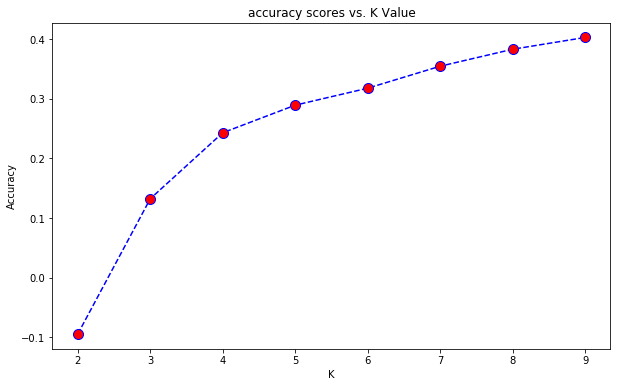

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [66]:
# clean_data = pd.concat([numericals, categoricals, y], axis=1)

In [67]:
# clean_data.to_csv('Lesson_4.05_data.csv')